# Minimal Viable Product



The main goal of this project is compare the highest years of employment 

What year was the hiring the most?
How did it affect salaries?
Can we say that the most employed year in which the salaries were lower than the average or increased?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
import math 
from scipy import stats
import random
%matplotlib inline

In [4]:
df= pd.read_csv('records.csv ')

In [5]:
df


,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,198429,Mrs.,Serafina,I,Bumgarner,F,serafina.bumgarner@exxonmobil.com,Vaughn Bumgarner,Sharell Bumgarner,Floyd,...,063-02-3609,212-376-9125,Clymer,Chautauqua,Clymer,NY,14724,Northeast,sibumgarner,vLzv}J-mM^ub
1,178566,Mrs.,Juliette,M,Rojo,F,juliette.rojo@yahoo.co.uk,Williams Rojo,Rufina Rojo,Stearns,...,671-48-9915,215-254-9594,Glenside,Montgomery,Glenside,PA,19038,Northeast,jmrojo,L8dG9In5y58
2,647173,Mr.,Milan,F,Krawczyk,M,milan.krawczyk@hotmail.com,Tommie Krawczyk,Billi Krawczyk,Soriano,...,527-99-6328,240-748-4111,Gibson Island,Anne Arundel,Gibson Island,MD,21056,South,mfkrawczyk,f!Cv42mMK
3,847634,Mr.,Elmer,R,Jason,M,elmer.jason@yahoo.com,Marshall Jason,Paulene Jason,Atherton,...,063-02-5994,236-751-5963,Mendota,Washington,Mendota,VA,24270,South,erjason,eiHcRh@btnmQ
4,260736,Ms.,Zelda,P,Forest,F,zelda.forest@ibm.com,Chester Forest,Marti Forest,Bedell,...,421-67-5501,212-268-4076,Schenectady,Schenectady,Schenectady,NY,12306,Northeast,zpforest,JR>O-}u]hWM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,784563,Mr.,Wally,F,Barbour,M,wally.barbour@gmail.com,Hubert Barbour,Maida Barbour,Merry,...,517-49-7222,203-364-4491,Hadlyme,New London,Hadlyme,CT,6439,Northeast,wfbarbour,K\Q68h}*[RGg
9996,538924,Mrs.,Hiroko,L,Gupta,F,hiroko.gupta@gmail.com,Jude Gupta,Diamond Gupta,Breunig,...,555-99-2664,236-689-2850,Chance,Chance,Chance,VA,22439,South,hlgupta,Ni8>~;vh3sN<5*n
9997,154258,Prof.,Marlon,Z,Ney,M,marlon.ney@yahoo.co.uk,Pete Ney,Cecile Ney,Asbury,...,311-35-8157,215-876-7412,Ronco,Fayette,Ronco,PA,15476,Northeast,mzney,LDQ\-NG]?qn%8m
9998,173003,Mrs.,Willia,Q,Weigand,F,willia.weigand@gmail.com,Lucius Weigand,Francesca Weigand,Rust,...,220-89-1238,210-886-5302,Aspermont,Stonewall,Aspermont,TX,79502,South,wqweigand,J#9pP1XzE8Rq*


In [6]:
df.describe

<bound method NDFrame.describe of       Emp ID Name Prefix First Name Middle Initial  Last Name Gender  \
0     198429        Mrs.   Serafina              I  Bumgarner      F   
1     178566        Mrs.   Juliette              M       Rojo      F   
2     647173         Mr.      Milan              F   Krawczyk      M   
3     847634         Mr.      Elmer              R      Jason      M   
4     260736         Ms.      Zelda              P     Forest      F   
...      ...         ...        ...            ...        ...    ...   
9995  784563         Mr.      Wally              F    Barbour      M   
9996  538924        Mrs.     Hiroko              L      Gupta      F   
9997  154258       Prof.     Marlon              Z        Ney      M   
9998  173003        Mrs.     Willia              Q    Weigand      F   
9999  133641         Mr.       Chas              F     Hurdle      M   

                                 E Mail     Father's Name      Mother's Name  \
0     serafina.bumgar

In [13]:
df.shape

(10000, 37)

In [17]:
df.isna().sum()

Emp ID                    0
Name Prefix               0
First Name                0
Middle Initial            0
Last Name                 0
Gender                    0
E Mail                    0
Father's Name             0
Mother's Name             0
Mother's Maiden Name      0
Date of Birth             0
Time of Birth             0
Age in Yrs.               0
Weight in Kgs.            0
Date of Joining           0
Quarter of Joining        0
Half of Joining           0
Year of Joining           0
Month of Joining          0
Month Name of Joining     0
Short Month               0
Day of Joining            0
DOW of Joining            0
Short DOW                 0
Age in Company (Years)    0
Salary                    0
Last % Hike               0
SSN                       0
Phone No.                 0
Place Name                0
County                    0
City                      0
State                     0
Zip                       0
Region                    0
User Name           

In [22]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [23]:
df.dtypes

Emp ID                      int64
Name Prefix                object
First Name                 object
Middle Initial             object
Last Name                  object
Gender                     object
E Mail                     object
Father's Name              object
Mother's Name              object
Mother's Maiden Name       object
Date of Birth              object
Time of Birth              object
Age in Yrs.               float64
Weight in Kgs.              int64
Date of Joining            object
Quarter of Joining         object
Half of Joining            object
Year of Joining             int64
Month of Joining            int64
Month Name of Joining      object
Short Month                object
Day of Joining              int64
DOW of Joining             object
Short DOW                  object
Age in Company (Years)    float64
Salary                      int64
Last % Hike                object
SSN                        object
Phone No.                  object
Place Name    

In [35]:
df = df.drop(['Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.','Half of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW','SSN', 'Phone No. ', 'Place Name','Zip', 'Region', 'User Name', 'Password',], axis = 1)

In [36]:
df

,Emp ID,Name Prefix,First Name,Last Name,Gender,E Mail,Date of Birth,Date of Joining,Quarter of Joining,Year of Joining,Age in Company (Years),Salary,Last % Hike,County,City,State
0,198429,Mrs.,Serafina,Bumgarner,F,serafina.bumgarner@exxonmobil.com,9/21/1982,2/1/2008,Q1,2008,9.49,69294,14%,Chautauqua,Clymer,NY
1,178566,Mrs.,Juliette,Rojo,F,juliette.rojo@yahoo.co.uk,5/8/1967,6/4/2011,Q2,2011,6.15,193912,27%,Montgomery,Glenside,PA
2,647173,Mr.,Milan,Krawczyk,M,milan.krawczyk@hotmail.com,4/4/1980,1/19/2012,Q1,2012,5.53,123681,11%,Anne Arundel,Gibson Island,MD
3,847634,Mr.,Elmer,Jason,M,elmer.jason@yahoo.com,4/9/1996,5/28/2017,Q2,2017,0.17,93504,26%,Washington,Mendota,VA
4,260736,Ms.,Zelda,Forest,F,zelda.forest@ibm.com,11/27/1959,1/28/2014,Q1,2014,3.50,176642,29%,Schenectady,Schenectady,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,784563,Mr.,Wally,Barbour,M,wally.barbour@gmail.com,5/12/1978,1/10/2010,Q1,2010,7.55,121605,21%,New London,Hadlyme,CT
9996,538924,Mrs.,Hiroko,Gupta,F,hiroko.gupta@gmail.com,7/7/1977,9/9/2001,Q3,2001,15.89,188357,9%,Chance,Chance,VA
9997,154258,Prof.,Marlon,Ney,M,marlon.ney@yahoo.co.uk,6/19/1990,11/9/2011,Q4,2011,5.72,136216,17%,Fayette,Ronco,PA
9998,173003,Mrs.,Willia,Weigand,F,willia.weigand@gmail.com,10/20/1960,7/30/2005,Q3,2005,12.00,158292,12%,Stonewall,Aspermont,TX


In [103]:
df.to_csv('update.records_csv')
df

,Emp ID,Name Prefix,First Name,Last Name,Gender,E Mail,Date of Birth,Date of Joining,Quarter of Joining,Year of Joining,Age in Company (Years),Salary,Last % Hike,County,City,State
0,198429,Mrs.,Serafina,Bumgarner,F,serafina.bumgarner@exxonmobil.com,9/21/1982,2/1/2008,Q1,2008,9.49,69294,14%,Chautauqua,Clymer,NY
1,178566,Mrs.,Juliette,Rojo,F,juliette.rojo@yahoo.co.uk,5/8/1967,6/4/2011,Q2,2011,6.15,193912,27%,Montgomery,Glenside,PA
2,647173,Mr.,Milan,Krawczyk,M,milan.krawczyk@hotmail.com,4/4/1980,1/19/2012,Q1,2012,5.53,123681,11%,Anne Arundel,Gibson Island,MD
3,847634,Mr.,Elmer,Jason,M,elmer.jason@yahoo.com,4/9/1996,5/28/2017,Q2,2017,0.17,93504,26%,Washington,Mendota,VA
4,260736,Ms.,Zelda,Forest,F,zelda.forest@ibm.com,11/27/1959,1/28/2014,Q1,2014,3.50,176642,29%,Schenectady,Schenectady,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,784563,Mr.,Wally,Barbour,M,wally.barbour@gmail.com,5/12/1978,1/10/2010,Q1,2010,7.55,121605,21%,New London,Hadlyme,CT
9996,538924,Mrs.,Hiroko,Gupta,F,hiroko.gupta@gmail.com,7/7/1977,9/9/2001,Q3,2001,15.89,188357,9%,Chance,Chance,VA
9997,154258,Prof.,Marlon,Ney,M,marlon.ney@yahoo.co.uk,6/19/1990,11/9/2011,Q4,2011,5.72,136216,17%,Fayette,Ronco,PA
9998,173003,Mrs.,Willia,Weigand,F,willia.weigand@gmail.com,10/20/1960,7/30/2005,Q3,2005,12.00,158292,12%,Stonewall,Aspermont,TX


In [55]:
Quarter = df['Quarter of Joining']

<AxesSubplot:title={'center':'Hiring in Quarters of years'}>

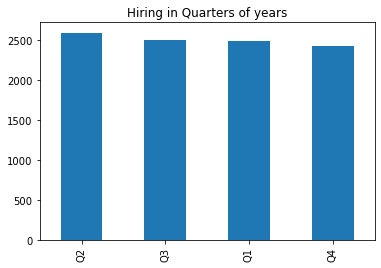

In [99]:
Quarter.value_counts().plot(kind='bar', title= 'Hiring in Quarters of years')

In [112]:
Year = df['Year of Joining']
Year

0       2008
1       2011
2       2012
3       2017
4       2014
        ... 
9995    2010
9996    2001
9997    2011
9998    2005
9999    2016
Name: Year of Joining, Length: 10000, dtype: int64

<AxesSubplot:title={'center':' Hiring in all years'}>

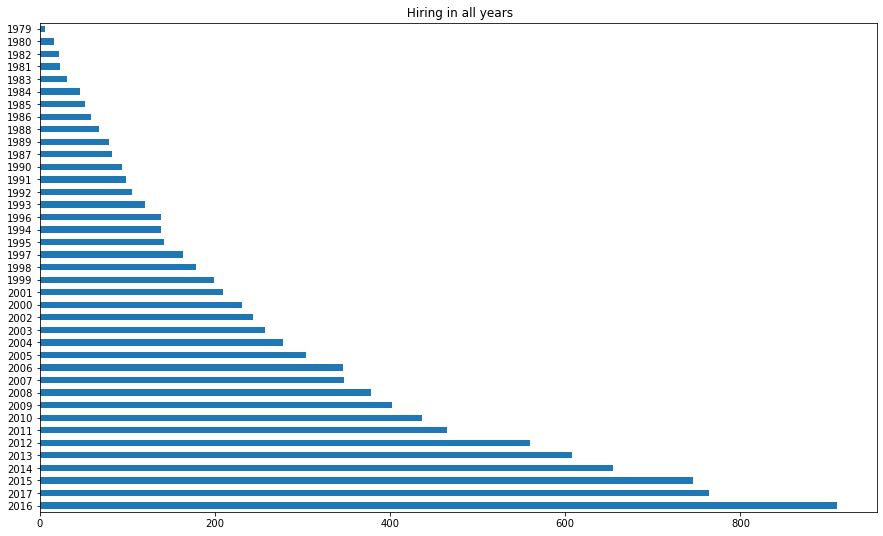

In [113]:
Year.value_counts().plot(kind='barh', title= ' Hiring in all years' , figsize=(15,9) )


In [114]:
df.shape

(10000, 16)